This notebook contains the analysis of the processed emerson data: distributions of V- and J- gene combinations, deletions on V- gene and J-gene, CDR3 length, and deletions on invidual V- and J- genes. The figures are saved on `figures` directory locating on the same root as this notebook.

In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import pandas as pd 
import os 
from tqdm import tqdm 

In [2]:
# Location of the processed emerson data 
# Use process_data.py script to process the pure emerson data
data_path = os.path.join(os.getcwd(), os.pardir, "data", "emerson", "emerson_processed")

If the `whole_data_flag` is set `True`, the whole dataset is utilised for the analysis. Otherwise the trainset is utilised.  

In [3]:
whole_data_flag = False

In [4]:
if whole_data_flag:
    whole_data = pd.read_csv(os.path.join(data_path, "whole_seqs_nn.tsv"), sep = '\t')
    data = whole_data
else:
    train_data = pd.read_csv(os.path.join(data_path, "whole_seqs_nn_train.tsv"), sep = '\t')
    data = train_data

In [5]:
len(data)

26427244

# V- and J-gene combinations distribution

In [ ]:
v_genes = data.loc[:,"v"]
j_genes = data.loc[:,"j"]

In [ ]:
@numba.jit(forceobj=True)
def create_combinations(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append(f'{data[i, 3]}, {data[i, 6]}')
    return result 

In [ ]:
v_j_combinations = create_combinations(data.to_numpy())

In [ ]:
gene_count = {}
for comb in tqdm(v_j_combinations, total = data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in gene_count.keys():
        gene_count[key] = 1
    else:
        gene_count[key] += 1
gene_count.update((x, y/data.shape[0]) for x, y in gene_count.items())

In [ ]:
gene_count_sorted = dict(sorted(gene_count.items(), key = lambda x: x[1], reverse= True))

In [ ]:
sum(gene_count_sorted.values())


In [ ]:
fig = plt.figure(figsize=(50,50))
plt.bar(x=list(gene_count_sorted.keys()), height= list(gene_count_sorted.values()), align='edge')
plt.xticks(rotation=-90)
plt.show

### Latex codes generation for the tables

The table is divided in to seven parts to fit the tables on pages of the latex document.

To use the tables just copy the printed latex codes and paste them to your document. You may need to add following lines around the printed latex codes:

<code>\begin{table}[]
\centering
\caption{Your caption}    
%%% Paste the printed table here%%% 
\end{table}
</code>

In [ ]:
indx = int(len(gene_count_sorted)/7)

In [ ]:
def gene_combination(begin_indx, end_indx):
    print(pd.DataFrame(data={'gene combination': list(gene_count_sorted.keys())[begin_indx:end_indx], 'fraction (%)': [f'{i*100:.3}'for i in list(gene_count_sorted.values())[begin_indx:end_indx]]}).to_latex(index=False))

In [ ]:
gene_combination(0, indx)
gene_combination(indx, 2*indx)
gene_combination(2*indx, 3*indx)
gene_combination(3*indx, 4*indx)
gene_combination(4*indx, 5*indx)
gene_combination(5*indx, 6*indx)
gene_combination(6*indx, len(gene_count_sorted))

# distribution of deletions of v gene  

In [ ]:
v_deletions= data.loc[:,"v_deletions"]

In [ ]:
v_deletion_count = {}
for comb in tqdm(v_deletions, total = data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in v_deletion_count.keys():
        v_deletion_count[key] = 1
    else:
        v_deletion_count[key] += 1
v_deletion_count.update((x, y/data.shape[0]) for x, y in v_deletion_count.items())

In [ ]:
v_deletion_count_sorted = dict(sorted(v_deletion_count.items(), key= lambda x: x[1], reverse=True))
v_deletion_count_sorted

In [ ]:
sum(list(v_deletion_count_sorted.values()))

In [ ]:
print(pd.DataFrame(data={'number of deletions': list(v_deletion_count_sorted.keys()), 'fraction (%)': [f'{i *100:.3}' for i in v_deletion_count_sorted.values()]}).to_latex(index=False))

In [ ]:
sum(list(v_deletion_count_sorted.values())[:11])

In [ ]:
list(v_deletion_count_sorted.keys())[:11]

In [ ]:
v_deletion_count_sorted = {int(k):v for k,v in v_deletion_count_sorted.items()}
v_deletion_count_sorted = dict(sorted(v_deletion_count_sorted.items(), reverse=False))

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(v_deletion_count_sorted.keys(), v_deletion_count_sorted.values())
plt.title("Deletions on V gene")
plt.xlabel("No. of deletions")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures", "V_deletion_train.png"))

# distribution of deletions on J - genes  

In [ ]:
j_deletions = data.loc[:,"j_deletions"]

In [ ]:
j_deletion_count = {}
for comb in tqdm(j_deletions, total = data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in j_deletion_count.keys():
        j_deletion_count[key] = 1
    else:
        j_deletion_count[key] += 1
j_deletion_count.update((x, y/data.shape[0]) for x, y in j_deletion_count.items())

In [ ]:
j_deletion_count_sorted = dict(sorted(j_deletion_count.items(), key= lambda x: x[1], reverse=True))
j_deletion_count_sorted

In [ ]:
print(pd.DataFrame(data={'number of deletions': list(j_deletion_count_sorted.keys()), 'fraction (%)': [f'{i *100:.3}' for i in j_deletion_count_sorted.values()]}).to_latex(index=False))

In [ ]:
sum(list(j_deletion_count_sorted.values())[:12])

In [ ]:
list(j_deletion_count_sorted.keys())[:12]

In [ ]:
j_deletion_count_sorted = {int(k):v for k,v in j_deletion_count_sorted.items()}
j_deletion_count_sorted = dict(sorted(j_deletion_count_sorted.items(), reverse=False))

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(j_deletion_count_sorted.keys(), j_deletion_count_sorted.values())
plt.title("Deletions on J gene")
plt.xlabel("No. of deletions")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures", "J_deletion_train.png"))

# Distribution of Lengths of cdr3 sequences 

In [ ]:
cdr3 = data.loc[:, 'seq']

In [ ]:
@numba.jit(forceobj=True)
def count_seq_len(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append(len(data[i]))
    return result

In [ ]:
cdr3_lengths = count_seq_len(cdr3.to_numpy())

In [ ]:
cdr3_len_count = {}
for len_ in tqdm(cdr3_lengths, total = data.shape[0], position=0, leave=True):
    key = str(len_)
    if key not in cdr3_len_count.keys():
        cdr3_len_count[key] = 1
    else:
        cdr3_len_count[key] += 1
cdr3_len_count.update((x, y/data.shape[0]) for x, y in cdr3_len_count.items())

In [ ]:
cdr3_len_count

In [ ]:
sum(list(cdr3_len_count.values()))

In [ ]:
sorted_cdr3_len = dict(sorted(cdr3_len_count.items(), key = lambda x: x[1], reverse = True))

In [ ]:
sum(list(sorted_cdr3_len.values())[:9])

In [ ]:
list(sorted_cdr3_len.keys())[:9]

In [ ]:
print(pd.DataFrame(data={'len of cdr3': sorted_cdr3_len.keys(), 'fraction (%)': [f'{i*100:.3}'for i in sorted_cdr3_len.values()]}).to_latex(index=False))

In [ ]:
sorted_cdr3_len = {int(k):v for k,v in sorted_cdr3_len.items()}
sorted_cdr3_len= dict(sorted(sorted_cdr3_len.items(), reverse=False))

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(sorted_cdr3_len.keys(), sorted_cdr3_len.values())
plt.title("Lengths of CDR3 sequences")
plt.xlabel("Length of CDR3 seq")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures","CDR3_train.png"))

# Specific V gene deletions 

In [15]:
v_genes_deletions = data.loc[:,['v', 'v_deletions']]

In [16]:
@numba.jit(forceobj=True)
def create_list(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append((data[i, 0], data[i, 1]))
    return result 

In [17]:
v_genes_deletions

,v,v_deletions
0,TRBV11-2,6
1,TRBV7-8,5
2,TRBV11-2,5
3,TRBV4-2,4
4,TRBV7-2,1
...,...,...
26427239,TRBV5-4,0
26427240,TRBV5-4,4
26427241,TRBV29-1,6
26427242,TRBV4-2,3


In [18]:
v_genes_deletions_list = create_list(v_genes_deletions.to_numpy())

100%|██████████| 26427244/26427244 [00:14<00:00, 1808057.07it/s]


In [19]:
gene_deletion_list = {}
for i in tqdm(v_genes_deletions_list, total = data.shape[0], position=0, leave=True):
    key = str(i[0])
    value = i[1]
    if key not in gene_deletion_list.keys():
        gene_deletion_list[key] = [value]
    else:
        gene_deletion_list[key].append(value)

100%|██████████| 26427244/26427244 [00:15<00:00, 1722991.14it/s]


In [20]:
v_gene_deletions = {}
for i in tqdm(gene_deletion_list.keys(), total = len(gene_deletion_list), position = 0, leave = True):
    gene_count = {}
    total = 0
    for j in gene_deletion_list[i]:
        key = j
        if key not in gene_count.keys():
            gene_count[key] = 1
        else:
            gene_count[key] += 1
        total += 1
    gene_count.update((x, y/total) for x, y in gene_count.items())
    v_gene_deletions[i] = gene_count

100%|██████████| 28/28 [00:07<00:00,  3.61it/s]


In [25]:
v_gene_deletions

{'TRBV11-2': {6: 0.0668108329813349,
  5: 0.2780749358750681,
  1: 0.1634565940019467,
  4: 0.11934047737109205,
  7: 0.030956731740463903,
  3: 0.112136752921587,
  0: 0.10246597858625187,
  2: 0.0933775320930745,
  10: 0.004691526938593108,
  8: 0.0216769817511769,
  11: 0.0026476403861575852,
  9: 0.0034113239426273164,
  14: 0.00011019081375915961,
  12: 0.0006014581917687462,
  13: 0.00019283392407852933,
  15: 4.361719711300068e-05,
  22: 7.652139844386084e-07,
  16: 7.652139844386084e-07,
  18: 7.652139844386084e-07,
  25: 1.5304279688772168e-06,
  21: 7.652139844386084e-07},
 'TRBV7-8': {5: 0.2964615149549796,
  0: 0.07697650092049547,
  4: 0.11355377499308159,
  1: 0.17956126076359988,
  3: 0.10272473071634101,
  2: 0.10794318678418521,
  6: 0.056056732011338706,
  8: 0.021752114788937814,
  7: 0.03154900743555196,
  11: 0.0028966491400339136,
  10: 0.005610588208896377,
  9: 0.003424478234529212,
  14: 0.00021049054982909664,
  12: 0.0008889753170447127,
  13: 0.0003152015847

In [21]:
trbv112 = v_gene_deletions['TRBV11-2']

In [22]:
trbv112 = {int(k): v for k,v in trbv112.items()}
trbv112 = dict(sorted(trbv112.items()))
trbv112

{0: 0.10246597858625187,
 1: 0.1634565940019467,
 2: 0.0933775320930745,
 3: 0.112136752921587,
 4: 0.11934047737109205,
 5: 0.2780749358750681,
 6: 0.0668108329813349,
 7: 0.030956731740463903,
 8: 0.0216769817511769,
 9: 0.0034113239426273164,
 10: 0.004691526938593108,
 11: 0.0026476403861575852,
 12: 0.0006014581917687462,
 13: 0.00019283392407852933,
 14: 0.00011019081375915961,
 15: 4.361719711300068e-05,
 16: 7.652139844386084e-07,
 18: 7.652139844386084e-07,
 21: 7.652139844386084e-07,
 22: 7.652139844386084e-07,
 25: 1.5304279688772168e-06}

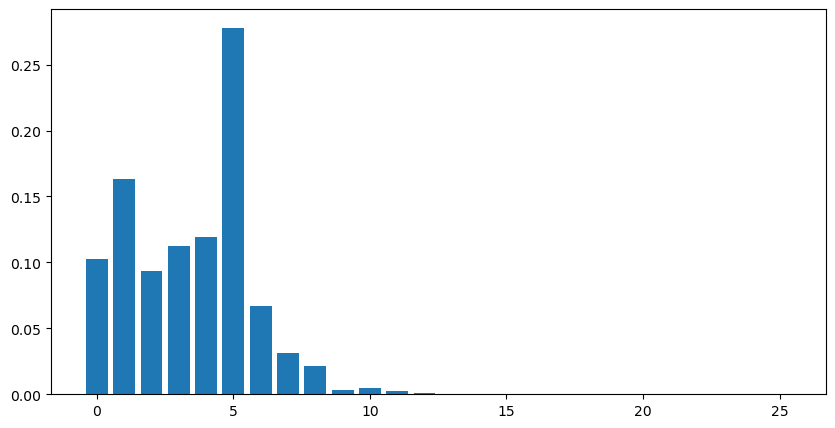

In [23]:
fig = plt.figure(figsize = (10,5))
plt.bar(trbv112.keys(), trbv112.values())
plt.show()

In [24]:
len(v_gene_deletions)

28

# Specific J gene deletions 

In [6]:
j_genes_deletions = data.loc[:,['j', 'j_deletions']]

In [7]:
@numba.jit(forceobj=True)
def create_list(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append((data[i, 0], data[i, 1]))
    return result 

In [8]:
j_genes_deletions

,j,j_deletions
0,TRBJ2-3,4
1,TRBJ2-2,0
2,TRBJ2-7,3
3,TRBJ1-4,7
4,TRBJ2-2,0
...,...,...
26427239,TRBJ2-3,3
26427240,TRBJ2-4,6
26427241,TRBJ2-7,2
26427242,TRBJ1-1,2


In [9]:
j_genes_deletions_list = create_list(j_genes_deletions.to_numpy())

100%|██████████| 26427244/26427244 [00:14<00:00, 1800166.62it/s]


In [10]:
gene_deletion_list = {}
for i in tqdm(j_genes_deletions_list, total = data.shape[0], position=0, leave=True):
    key = str(i[0])
    value = i[1]
    if key not in gene_deletion_list.keys():
        gene_deletion_list[key] = [value]
    else:
        gene_deletion_list[key].append(value)

100%|██████████| 26427244/26427244 [00:14<00:00, 1809524.42it/s]


In [13]:
j_gene_deletions = {}
for i in tqdm(gene_deletion_list.keys(), total = len(gene_deletion_list), position = 0, leave = True):
    gene_count = {}
    total = 0
    for j in gene_deletion_list[i]:
        key = j
        if key not in gene_count.keys():
            gene_count[key] = 1
        else:
            gene_count[key] += 1
        total += 1
    gene_count.update((x, y/total) for x, y in gene_count.items())
    j_gene_deletions[i] = gene_count

100%|██████████| 12/12 [00:07<00:00,  1.56it/s]


In [14]:
j_gene_deletions

{'TRBJ2-3': {4: 0.1524070393057349,
  7: 0.028599800434534382,
  6: 0.1110908696565281,
  2: 0.17865061985253605,
  1: 0.10342344485190874,
  0: 0.14708449153599756,
  3: 0.11176834732227899,
  5: 0.10368604908155546,
  15: 0.0009218645862728795,
  8: 0.023589696702426444,
  9: 0.012564100008214975,
  11: 0.006760684022148123,
  12: 0.0023221913291795577,
  10: 0.009227926378697985,
  14: 0.003461632456507893,
  18: 0.0006011712011153117,
  17: 0.0007761261132752281,
  19: 0.00023304406767077267,
  13: 0.0016203093436578501,
  16: 0.0010366680060398972,
  21: 0.00017392374371889523},
 'TRBJ2-2': {0: 0.10093451764342862,
  7: 0.10195940137973596,
  1: 0.0965825186693142,
  2: 0.08566545310280295,
  4: 0.15720444176396217,
  3: 0.0974721538187188,
  6: 0.1517233675495561,
  5: 0.14223643055936813,
  14: 0.000921193153015242,
  13: 0.0030295683466210897,
  8: 0.03525830476415652,
  10: 0.005773611898669755,
  9: 0.013122118453717933,
  18: 0.0011080365712178985,
  11: 0.002922872239175604